In [1]:
import pandas as pd #dataframe
import seaborn as sns #create plot
import numpy as np # library with matrix
import matplotlib.pyplot as plt #create plot

In [2]:
# import data
data = pd.read_excel("Bank-Customer-Details.xlsx", sheet_name ='Data')

In [3]:
data

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Family,Exited
0,15586133,666,Mid,Female,44,2,2690919000,1,301729000,18,Married,0
1,15713354,597,Mid,Female,22,4,2233629000,1,310328000,45,Single,0
2,15710390,655,North,Female,39,6,2081888000,2,655373000,12,Married,0
3,15732832,707,North,Female,40,5,0,2,180632000,49,Single,0
4,15568449,661,South,Male,38,7,3146147000,1,68864000,44,Single,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,15794849,850,Mid,Male,22,4,2014333000,2,46382000,44,Married,1
8996,15600392,735,North,Female,53,8,2724598000,2,750002000,22,Single,0
8997,15600106,631,North,Male,36,1,0,2,585822000,33,Single,0
8998,15684921,792,South,Male,25,7,3142969000,1,574812000,28,Single,0


In [173]:
# view data's information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       9000 non-null   int64 
 1   CreditScore      9000 non-null   int64 
 2   Geography        9000 non-null   object
 3   Gender           9000 non-null   object
 4   Age              9000 non-null   int64 
 5   Tenure           9000 non-null   int64 
 6   Balance          9000 non-null   int64 
 7   NumOfProducts    9000 non-null   int64 
 8   EstimatedSalary  9000 non-null   int64 
 9   SpendingScore    9000 non-null   int64 
 10  Family           9000 non-null   object
 11  Exited           9000 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 843.9+ KB


Dataset have no missing data, 11 columns, 9000 rows 

In [211]:
# drop 'CustomerId' column
data = data.drop('CustomerId',axis=1)

## 1. Describe data

In [97]:
# Describe data with statistic
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Exited
count,9000.000000,9000.000000,9000.000000,9.000000e+03,9000.000000,9.000000e+03,9000.000000,9000.000000
mean,650.296111,38.898000,4.967333,1.678519e+09,1.528889,4.398055e+08,50.273444,0.109889
std,96.943138,10.481053,2.802821,1.373367e+09,0.581074,2.533351e+08,28.976039,0.312769
min,350.000000,18.000000,1.000000,0.000000e+00,1.000000,5.100000e+04,1.000000,0.000000
25%,583.000000,32.000000,2.000000,0.000000e+00,1.000000,2.238330e+08,25.000000,0.000000
50%,651.000000,37.000000,5.000000,2.139412e+09,1.000000,4.396615e+08,50.000000,0.000000
75%,718.000000,44.000000,7.000000,2.806643e+09,2.000000,6.564368e+08,76.000000,0.000000
max,850.000000,92.000000,10.000000,5.519758e+09,4.000000,8.799670e+08,100.000000,1.000000


The oldest age in the data is 92, showing that there are still elderly people using banking services. The minimum age is 18, banks should approach more younger customers. The standard deviation of Balance and Estimated Salary is high.

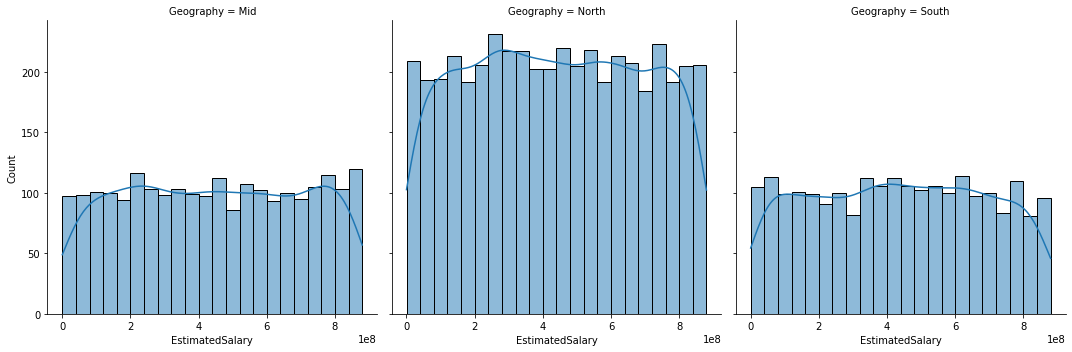

In [177]:
#Estimated salary of customers in each region
sns.displot(data=data, x="EstimatedSalary", col="Geography", kde=True)

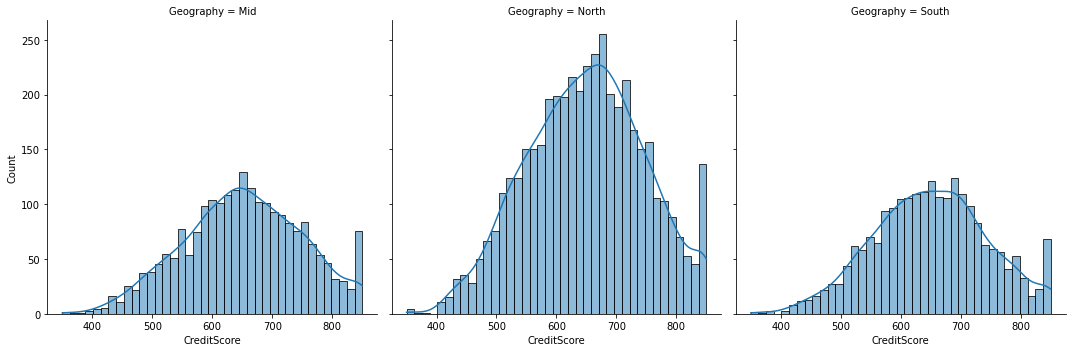

In [183]:
sns.displot(data=data, x="CreditScore", col="Geography", kde=True)

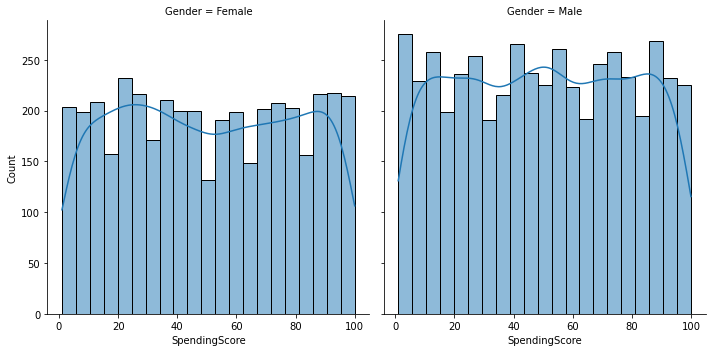

In [180]:
sns.displot(data=data, x="SpendingScore", col="Gender", kde=True)

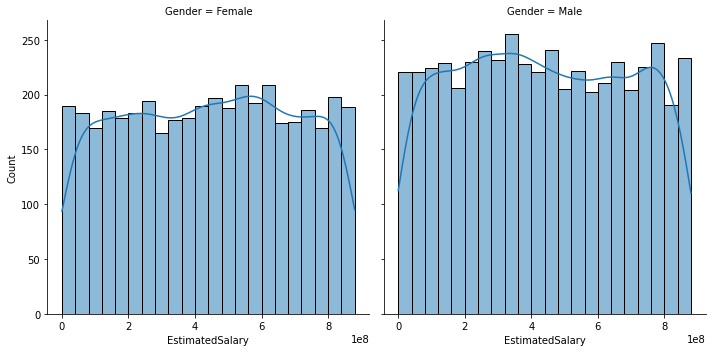

In [191]:
sns.displot(data=data, x="EstimatedSalary", col="Gender", kde=True)

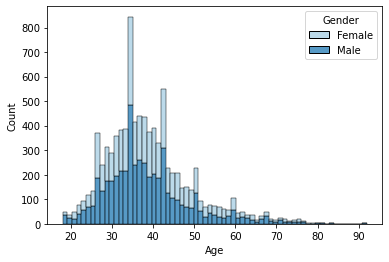

In [224]:
sns.histplot(data=data, x="Age",hue="Gender",multiple="stack", palette ='Paired')

The age variable is not normally distributed. The age of customers is mainly middle-aged, of which the age of 35 is the majority. At different ages, the number of female customers is almost equal to the number of male customers. For those under 20 years old and over 65 years old, the number of male customers is higher than that of female customers.

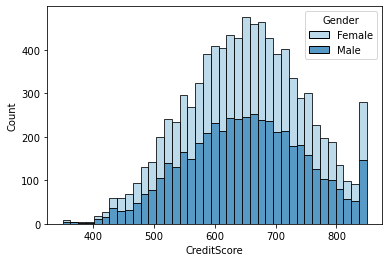

In [223]:
sns.histplot(data=data, x="CreditScore",hue="Gender",multiple="stack", palette ='Paired' )

Theo như hình trên, đa số khách hàng có điểm tín dụng cao. Điểm tín dụng từ 600 đến 700 chiếm đa số. Ngân hàng cũng có nhiều khách hàng rất uy tín với điểm tín dụng trên 850.

In [216]:
data2 = data
data2['Exited'] = data2['Exited'].map({0: 'Stay with bank', 1: 'No stay with bank'})

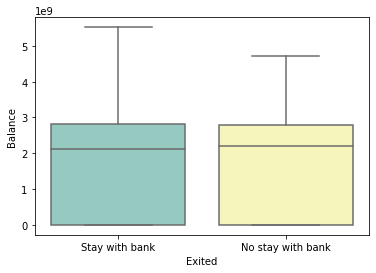

In [221]:
# Boxplot Balance 
sns.boxplot(x="Exited", y="Balance", data=data2,  palette="Set3")

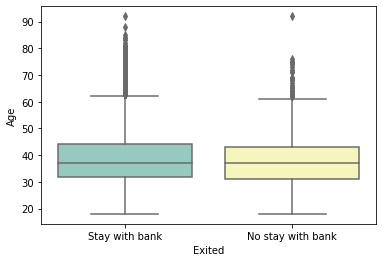

In [219]:
sns.boxplot(x="Exited", y="Age", data=data,  palette="Set3")

Both customers who stay with bank or no have an outlier.

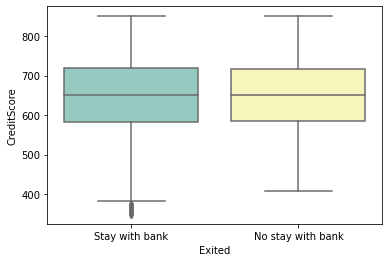

In [220]:
#Boxplot Credit score
sns.boxplot(x="Exited", y="CreditScore", data=data,  palette="Set3")

Customers who stay with the bank have an outlier, indicating that some customers with low credit scores still stay with the bank

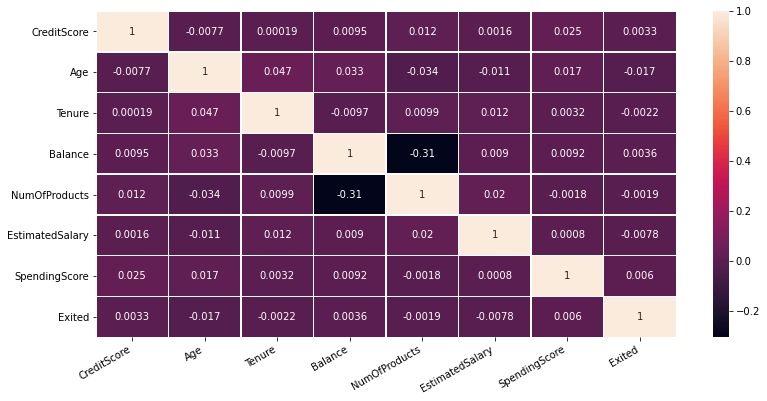

In [103]:
# Correlation
corrmat = data.corr()
plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

All variables have low correlation with each other. In there, NumofProducts and Balance have the highest correlation, CreditScore and Tenure have the lowest correlation. The correlation of other variables to Exited is also very low, the variable with the highest correlation with Exited is Age, the lowest is NumOfProduct. CreditScore, Balance , SpendingScore are positively correlated with Exited. Age, Tenure, NumOfProducts, EstimatedSalary are negatively correlated with Exited.

## 2. Building decision tree model

In [104]:
#relabel data
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Geography'] = data['Geography'].map({'North': 0, 'Mid': 1, 'South': 2})
data['Family'] = data['Family'].map({'Single': 0, 'Married': 1, 'Divorced': 2, 'Not specified': 3})
data


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Family,Exited
0,666,1,1,44,2,2690919000,1,301729000,18,1,0
1,597,1,1,22,4,2233629000,1,310328000,45,0,0
2,655,0,1,39,6,2081888000,2,655373000,12,1,0
3,707,0,1,40,5,0,2,180632000,49,0,0
4,661,2,0,38,7,3146147000,1,68864000,44,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8995,850,1,0,22,4,2014333000,2,46382000,44,1,1
8996,735,0,1,53,8,2724598000,2,750002000,22,0,0
8997,631,0,0,36,1,0,2,585822000,33,0,0
8998,792,2,0,25,7,3142969000,1,574812000,28,0,0


In [105]:
# Split X, y set
X = data.iloc[:, :-1].values
y= data.iloc[:,-1].values

In [112]:
# Split data to training set and test set with test_size = 20%, random state = 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

### Building model on training set

In [113]:
# train the decision tree model
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) # use entropy instead of gini
clf = DT_classifier.fit(X_train, y_train)

In [114]:
# import more some necessary packages
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

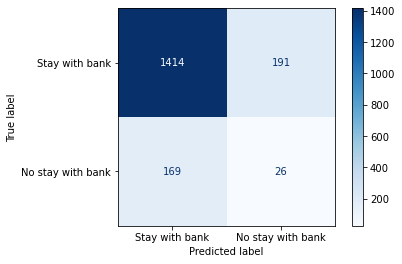

In [115]:
# Confusion matrix
# 0: Stay with bank
# 1: No stay with bank
clf = DT_classifier.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test,y_test,cmap= 'Blues', display_labels = ['Stay with bank', 'No stay with bank'])

- True Positive = 1414: The model correctly predicted 1407 people who did not stay with the bank.
- False Positive = 169: There are 172 customers who stay with the bank who pay their debts on time and are misclassified by the model.
- False negative = 191: There are 199 customers who do not stay with the bank but are misclassified by the model.
- True negative = 26: There are 22 customers staying with the bank who are correctly classified by the model.
- The model incorrectly detected a lot of customers staying with bank to no stay with bank, more than the number of correct detections was 26.

In [116]:
# classification report and accuracy
y_pred = DT_classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1605
           1       0.12      0.13      0.13       195

    accuracy                           0.80      1800
   macro avg       0.51      0.51      0.51      1800
weighted avg       0.81      0.80      0.80      1800

Decision Tree accuracy:  0.8


- Support0=1605, support1=195 -> Imbalanced dataset. This makes the metrics in class 1 very low.
- Precision and recall of class 1 are much lower than that of class 0, this is because the data is imbalanced, and the number of class 1 is much less than that of class 0.
- The imbalanced dataset also makes the precision, recall, f1-score calculated by the macro average also very low, 51%. When weighted averages these metrics are increased.
- Accuracy of the model is 80%, but due to the imbalanced dataset, it is impossible to trust the accuracy too much.

**The reason choose decision tree algorithm:**
- Decision tree does not need to scale feature, decision tree does not perform distance calculation but uses rule based approach.
- Decision tree is powerful with outliers, this is suitable for this dataset because it has many outliers.
- Less training time: This makes tissue building happen faster, and less time-consuming.

### Oversampling (Upsample) data 

Use oversampling data to overcome the imbalanced dataset. Oversampling data helps to increase the number of minority data (class 1) to create a balance for the dataset.

In [128]:
#upsample minority data
from sklearn.utils import resample

df = data

# Split majority data and minority data
df_majority = df[df['Exited']==0]
df_minority = df[df['Exited']==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1234) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.value_counts('Exited')


Exited
0    8011
1    8011
dtype: int64

=> Number of class 0 = number of class 1

### Building model with balanced data

In [129]:
# Split X, y set 
X = df_upsampled.iloc[:, :-1].values
y= df_upsampled.iloc[:,-1].values

In [130]:
# Split data to training set and test set with test_size = 0.2, random state =0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [131]:
# train the decision tree model
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) # use entropy instead of gini
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

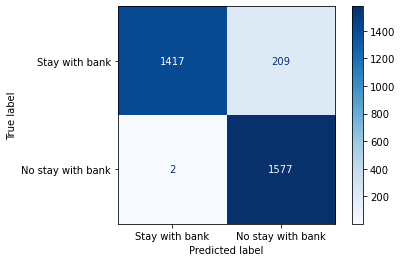

In [132]:
# Confusion matrix
clf = DT_classifier.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test,y_test,cmap= 'Blues', display_labels = ['Stay with bank', 'No stay with bank'])

- True Positive = 1474: The model correctly predicted 1407 people who stayed with the bank.
- False Positive = 2: There are 2 customers who do not stay with the bank but the model predicts wrong.
- False negative = 209: There are 209 customers who stay with the bank but are detected wrongly by the model.
- True negative = 1577: There are 1577 customers staying with the bank correctly detected by the model.
- The model with the balanced dataset only wrongly predicted 2 customers (False positive = 2), greatly reduced compared to the previous model.

In [133]:
# classification report and accuracy
y_pred = DT_classifier.predict(X_test)

print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1626
           1       0.88      1.00      0.94      1579

    accuracy                           0.93      3205
   macro avg       0.94      0.94      0.93      3205
weighted avg       0.94      0.93      0.93      3205

Decision Tree accuracy:  0.9341653666146645


- **After upsample data:** all metric are increase.
    - Support0 is close to support 1 -> data is no longer imbalanced.
    - Accuracy increased from 80% to 93.41%.
    - Precion, recall and f1-score after data balance also increase
    - Macro average and weighted average are equal.

In [135]:
# feature importance
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
0,CreditScore,0.209867
7,EstimatedSalary,0.201703
8,SpendingScore,0.165480
5,Balance,0.133536
3,Age,0.127059
4,Tenure,0.071584
1,Geography,0.039345
6,NumOfProducts,0.028656
9,Family,0.021030
2,Gender,0.001742


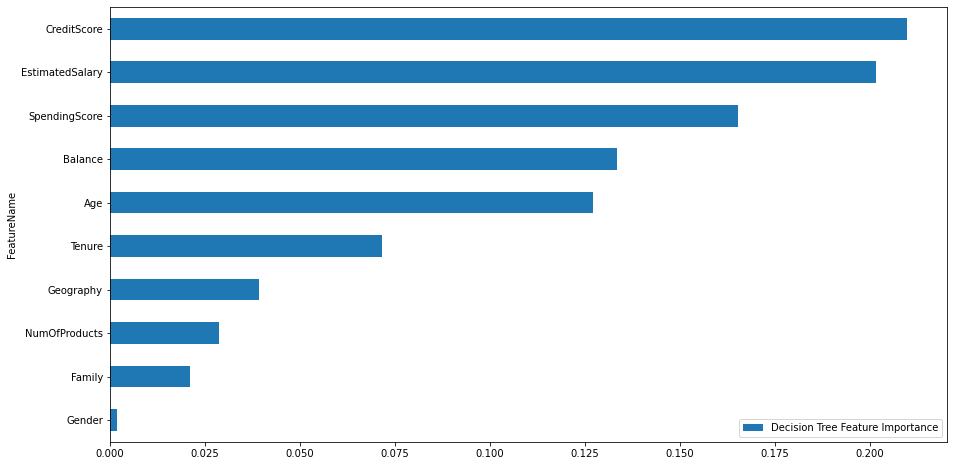

In [136]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

All variables have an influence on whether the customer continues to use the bank or not.
The most influential variable that customers stay with the bank is Salary. The next influencing variables are CreditScore, SpendingScore,...
The variable that has the least influence on whether customers stay with the bank or not is Gender.

## 3. Test data again 

In [165]:
test_data = pd.read_csv('test_sample_data.csv').drop('CustomerId',1)

In [166]:
test_data['Gender'] = test_data['Gender'].map({'Male': 0, 'Female': 1})
test_data['Geography'] = test_data['Geography'].map({'North': 0, 'Mid': 1, 'South': 2})
test_data['Family'] = test_data['Family'].map({'Single': 0, 'Married': 1, 'Divorced': 2, 'Not specified': 3})
test_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,SpendingScore,Family,Exited
0,633,0,0,40,4,3312716000,1,152551000,45,0,0
1,733,2,1,30,1,1833024000,1,254184000,38,0,0
2,705,2,0,44,1,4060147000,1,302985000,39,0,0
3,660,1,0,35,8,1290111000,1,874166000,97,0,0
4,643,0,0,34,7,0,2,441338000,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,540,1,0,39,4,2800123000,1,71061000,85,1,0
996,756,1,1,39,5,3285989000,2,480033000,78,1,0
997,595,1,1,26,8,2608050000,1,665246000,93,0,1
998,464,1,0,33,8,3614264000,2,16325000,15,0,0


In [167]:
X_test2 = test_data.iloc[:, :-1].values
y_test2 = test_data.iloc[:,-1].values

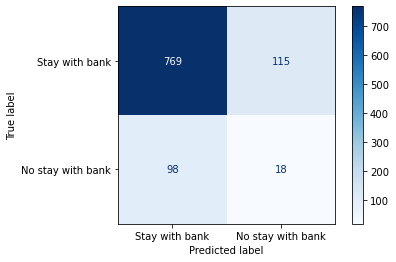

In [168]:
# Confusion matrix
plot_confusion_matrix(clf, X_test2,y_test2,cmap= 'Blues', display_labels = ['Stay with bank', 'No stay with bank'])

- True Positive = 769: The model correctly predicted 1407 people who stayed with the bank.
- False Positive = 98: There are 98 customers who do not stay with the bank but the model predicts wrong.
- False negative = 115: There are 115 customers who stay with the bank but are detected wrongly by the model.
- True negative = 18: There are 18 customers staying with the bank correctly detected by the model.
- The model incorrectly detected a lot of customers staying with bank to no stay with bank, more than the number of correct detections was 18. The number of false predictions and false detections of the model is many.

In [169]:
# classification report and accuracy
y_pred2 = DT_classifier.predict(X_test2)
print(classification_report(y_test2,y_pred2))
print('Decision Tree accuracy: ', accuracy_score(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       884
           1       0.14      0.16      0.14       116

    accuracy                           0.79      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.80      0.79      0.79      1000

Decision Tree accuracy:  0.787


When adding standout data, all the metrics of the classification report are reduced (especially class 1 and macro average)  because the standout data is imbalanced.
The model's accuracy is therefore also reduced from 93% to 78.7%. Precision, recall and f1-score of class 1 are very lơ.